# Motivación del control digital

- ¿Es el control digital una cuestión de implementación? 
- ¿Alcanza con pensar todo como si fuera de tiempo continuo?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control as ctrl

## Retardo en la entrada

En el ejemplo se muestra que el sistema discretizado no hace una buena predicción de la salida de un sistema de tiempo continuo cuando aparecen retardos en la entrada.

Periodo de muestreo: 0.40 s
Sistema (tiempo continuo): 
  1
-----
s + 1

Sistema (tiempo continuo): 
  0.3297
----------
z - 0.6703

dt = 0.4



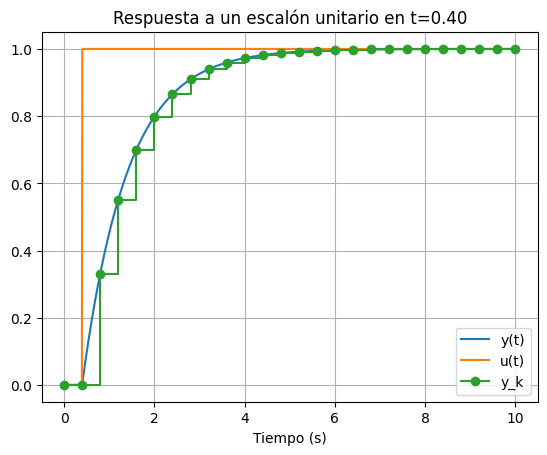

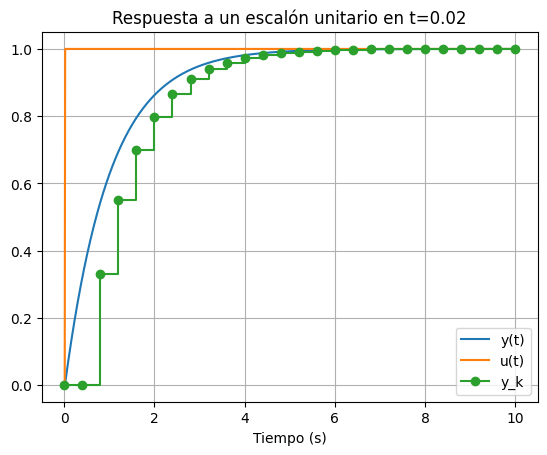

In [35]:
t = np.linspace(0, 10, 1001)
N = 40
T = t[N]-t[0]
print(f"Periodo de muestreo: {T:.2f} s")

# Sistema de tiempo continuo
G = ctrl.TransferFunction([1], [1, 1])
print("Sistema (tiempo continuo):",G)

# Sistema discretizado
Gd = ctrl.c2d(G, T, method='zoh')
print("Sistema (tiempo continuo):",Gd)


for idx_step in [N,2]:
    u = np.zeros_like(t)
    u[idx_step:] = 1 
    uk = u[::N]

    t_out, y = ctrl.forced_response(G, t, U=u)
    tk_out, yk = ctrl.forced_response(Gd, tk, U=uk)

    plt.figure()
    plt.plot(t_out, y, label="y(t)")
    plt.plot(t, u, label="u(t)")
    plt.step(tk_out, yk, 'o-',where='post',label='y_k')
    plt.legend()
    plt.title(f"Respuesta a un escalón unitario en t={idx_step*T/N:.2f}")
    plt.xlabel("Tiempo (s)")
    plt.grid()

## Senoide muestreada

Periodo de muestreo: 0.11 s
Sistema (tiempo continuo): 
  1
-----
s + 1



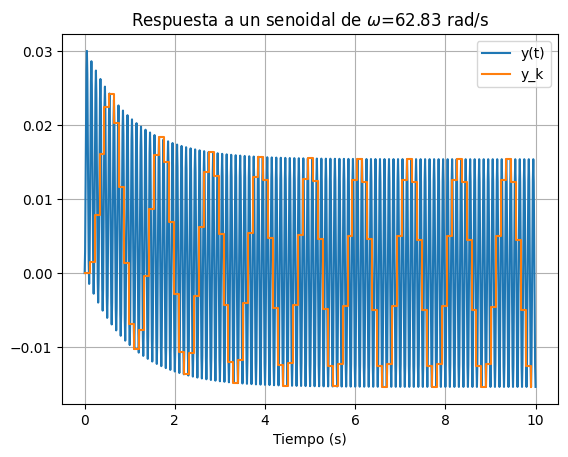

In [53]:
t = np.linspace(0, 10, 1001)
N = 11
T = t[N]-t[0]
print(f"Periodo de muestreo: {T:.2f} s")

# Sistema de tiempo continuo
G = ctrl.TransferFunction([1], [1, 1])
print("Sistema (tiempo continuo):",G)

w = np.pi*2 / 0.1
u = np.sin(w*t)

t_out, y = ctrl.forced_response(G, t, U=u)
yk = y[::N]
tk_out = t[::N]

plt.figure()
plt.plot(t_out, y, label="y(t)")
plt.step(tk_out, yk, '-',where='post',label='y_k')
plt.legend()
plt.title(f"Respuesta a un senoidal de $\omega$={w:.2f} rad/s")
plt.xlabel("Tiempo (s)")
plt.grid()